### Group Actvity - Week 15 (Group 5)

### Intrusion Detection Dataset:

##### Activity Descriptions:
Jio fibre wants to implement AI/ML in their systems. The activity task is to build a network intrusion detector, a predictive model capable of distinguishing between bad&#39;&#39; connections, called intrusions or attacks, andgood'' normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions in the network environment. Your target is building a machine efficient learning model using probabilistic approach models, probabilities of bad or good connections using naïve bayes model. This is a multi-class classification. Fine tune the model and make a model which has at least 97 percent accuracy.

##### Importing relevant libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

#### Reading the dataset into Python environment:

In [2]:
dataset = pd.read_csv('tcp-connection (1).csv')
dataset.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


###### Checking the basic details of the dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [4]:
dataset.shape

(494021, 42)

In [5]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataset.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serrer_rate          

        There are 494021 features  with 42 columns in the dataset. It has 4 categorical columns and 38 numerical columns.

#### Necessary Preprocessing Steps to be done:

 1. Checking the nulls or missing values in the dataset.

In [7]:
dataset.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
[col for col in dataset.columns if dataset[col].isnull().sum() > 0]

[]

    There are no null values present in the dataset.

##### Analyzing the target variable as "Intrusion" in the column which is a categorical feature.

In [9]:
dataset.intrusion.value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: intrusion, dtype: int64

In [10]:
dataset['intrusion']

0          b'normal.'
1          b'normal.'
2           b'smurf.'
3           b'smurf.'
4         b'neptune.'
             ...     
494016    b'neptune.'
494017      b'smurf.'
494018     b'normal.'
494019     b'normal.'
494020    b'neptune.'
Name: intrusion, Length: 494021, dtype: object

### Exploratory Data Analysis

#### Visualizing Categorical features in the dataset

Text(0, 0.5, 'Count')

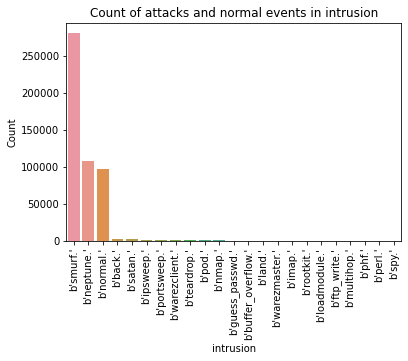

In [11]:
grouped_labels = dataset.groupby("intrusion")["intrusion"].count().sort_values(ascending=False)

plt.xticks(rotation=90)


sns.barplot(x=grouped_labels.index, y=grouped_labels.values)
plt.title("Count of attacks and normal events in intrusion")
plt.ylabel("Count")

In [12]:
dataset.protocol_type.value_counts()

b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: protocol_type, dtype: int64

Text(0, 0.5, 'Count')

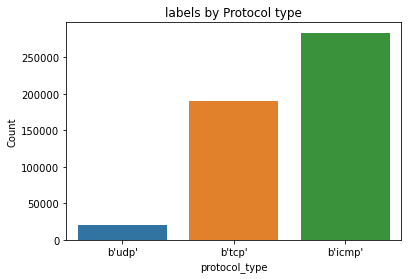

In [13]:
## 1. protocol_type

sns.countplot(dataset['protocol_type'])
    
plt.title("labels by Protocol type")
plt.ylabel("Count")

##### 3 types of protocol_type are there.  And b'icmp' protocol is widely used than the other 2.

In [14]:
dataset.service.value_counts()

b'ecr_i'      281400
b'private'    110893
b'http'        64293
b'smtp'         9723
b'other'        7237
               ...  
b'X11'            11
b'tim_i'           7
b'tftp_u'          1
b'red_i'           1
b'pm_dump'         1
Name: service, Length: 66, dtype: int64

Text(0, 0.5, 'Count')

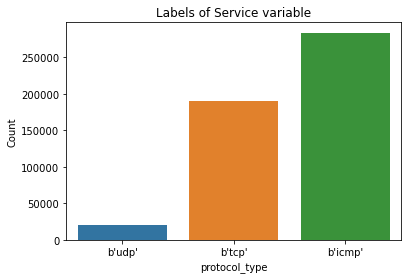

In [15]:
## 2. 'service' variable

sns.countplot(dataset['protocol_type'])
plt.title("Labels of Service variable")
plt.ylabel("Count")

In [16]:
dataset.flag.value_counts()

b'SF'        378440
b'S0'         87007
b'REJ'        26875
b'RSTR'         903
b'RSTO'         579
b'SH'           107
b'S1'            57
b'S2'            24
b'RSTOS0'        11
b'S3'            10
b'OTH'            8
Name: flag, dtype: int64

Text(0, 0.5, 'Count')

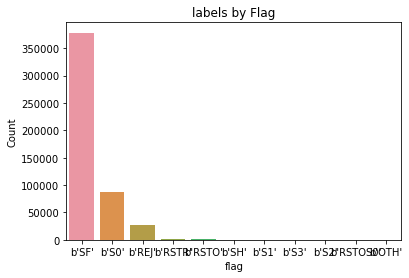

In [17]:
# "flag" variable
sns.countplot(dataset['flag'])
plt.title("labels by Flag")
plt.ylabel("Count")

Text(0.5, 1.0, 'Number of connections to the same host as the current connection in the past two seconds ')

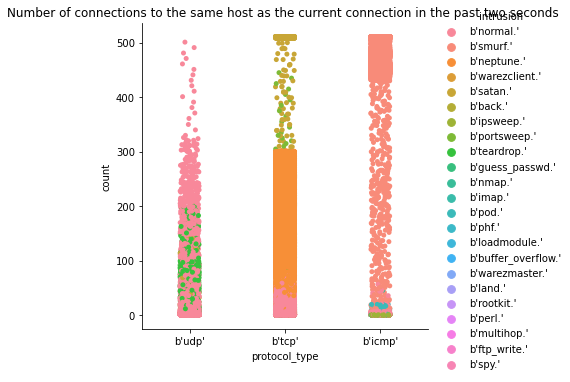

In [18]:
sns.catplot(x="protocol_type", y="count", hue="intrusion", data=dataset)
plt.title("Number of connections to the same host as the current connection in the past two seconds ")

###### Feature Selection:-

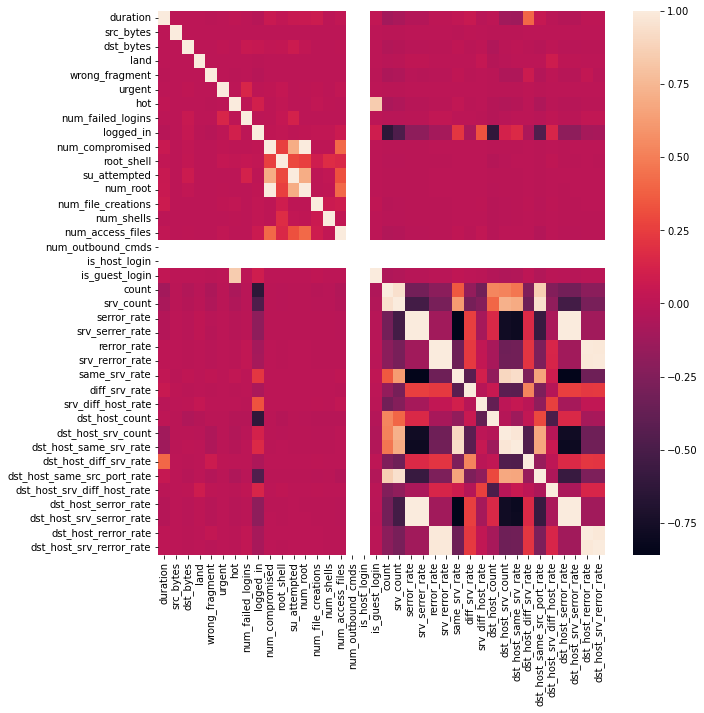

In [19]:
# Feature Selection

corrmatrix = dataset.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corrmatrix)
plt.show()

In [20]:
## Feature Reduction

# Dropping columns with high correlation value

dataset.drop(columns=['num_root', 'srv_serrer_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 
                'dst_host_srv_rerror_rate', 'dst_host_same_srv_rate'], axis = 1, inplace=True)

###### Converting the categorical variables into numerical variables

###### Label Encoding:-

In [21]:
#Label encoding:-

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['intrusion'] = le.fit_transform(dataset['intrusion'])
dataset['protocol_type'] = le.fit_transform(dataset['protocol_type'])
dataset['service'] = le.fit_transform(dataset['service'])
dataset['flag'] = le.fit_transform(dataset['flag'])


dataset.dtypes

duration                         int64
protocol_type                    int32
service                          int32
flag                             int32
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate            

#### One-Hot Encoding:

In [22]:
dataset = pd.get_dummies(data=dataset, columns=['protocol_type'])

dataset.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,intrusion,protocol_type_0,protocol_type_1,protocol_type_2
0,0,11,9,44,134,0,0,0,0,0,...,0.01,139,89,0.01,0.01,0.00,11,0,0,1
1,0,50,9,1489,385,0,0,0,0,0,...,1.00,5,116,0.00,0.20,0.02,11,0,1,0
2,0,14,9,1032,0,0,0,0,0,0,...,0.00,255,255,0.00,1.00,0.00,18,1,0,0
3,0,14,9,1032,0,0,0,0,0,0,...,0.00,255,255,0.00,1.00,0.00,18,1,0,0
4,0,45,5,0,0,0,0,0,0,0,...,0.00,255,6,0.07,0.00,0.00,9,0,1,0


##### Splitting into feature set and class labels

In [23]:
# Creating feature vector and target vector.
X = dataset.drop("intrusion", axis=1)
y = dataset["intrusion"]



# Constant features 
[col for col in X.columns if X[col].nunique() == 1]

['num_outbound_cmds', 'is_host_login']

In [24]:
# Those two columns have no variance, thus they won't be of any use to our model. Let's drop them


X.drop(["num_outbound_cmds", "is_host_login"], axis=1, inplace=True)

#### Splitting the dataset into Training set and Test Set:

In [25]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test...

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state= 42)

##### Feature Scaling:-

    Standardization and Normalisation

In [26]:
scale = StandardScaler()
X = scale.fit_transform(X)

## Implementing Naive Bayes Models:

#### 1. Fitting Gaussian Nave Bayes to theTraining Set:


In [27]:

g_NB = GaussianNB()
type1 = g_NB.fit(X_train, y_train)
g_NBpredict = type1.predict(X_test)

print("The accuracy score of Gaussian Naive Bayes is : ", accuracy_score(y_test, g_NBpredict)*100)





The accuracy score of Gaussian Naive Bayes is :  94.71604618399107


In [28]:
##Making the confusion Matrix


#confusion_matrix(y_test,g_NBpredict)


##### 2. Fiiting Bernoulli's Naive - Bayes type into the training set:

In [29]:
## Bernoulli's type of Naive - Bayes:

b_NB = BernoulliNB()
type2 = b_NB.fit(X_train, y_train)

b_NBpredict = type2.predict(X_test)

print("The accuracy score of Bernoulli's Naive Bayes is : ", accuracy_score(y_test, b_NBpredict)*100)

The accuracy score of Bernoulli's Naive Bayes is :  99.21056466892296


In [30]:
## Confusion Matrix of Bernoulli's NB :-

#confusion_matrix(y_test,b_NBpredict)

##### 3. Fiiting Multinomial Naive - Bayes type into the training set:

In [31]:
X = dataset.drop('intrusion', axis =1)
y = dataset['intrusion']

In [32]:
#Feature Scaling using MinMax Scaler
minimax = MinMaxScaler()
X = minimax.fit_transform(X)
print(X)

[[0.         0.16923077 0.9        ... 0.         0.         1.        ]
 [0.         0.76923077 0.9        ... 0.         1.         0.        ]
 [0.         0.21538462 0.9        ... 1.         0.         0.        ]
 ...
 [0.         0.76923077 0.9        ... 0.         1.         0.        ]
 [0.         0.33846154 0.9        ... 0.         1.         0.        ]
 [0.         0.69230769 0.1        ... 0.         1.         0.        ]]


In [33]:
multi_NB = MultinomialNB()
type3 = multi_NB.fit(X_train, y_train)

multi_NBpredict = type3.predict(X_test)

print("The accuracy score of Multinomial Naive-Bayes is : ", accuracy_score(y_test, multi_NBpredict)*100)

The accuracy score of Multinomial Naive-Bayes is :  83.79673861998607


#### INSIGHTS:

######        From the types of Naive -Bayes Modeling, 
######                It is seen that the Bernoulli's Naive -Bayes type has obtained a maximum accuracy of 99.32% than the other two models using probability approach. Gaussian Naive-Bayes model is also good with a 94.72% accuracy and Multinomial Naive -Bayes has got an accuracy of 83.79% only.



######        Though the Bernoulli's Naive Bayes model is more accurate, Jio fibre can implement it for an efficient machine learning model in this Intrusion Detection dataset.